In [3]:
#importing Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv("C:\\Users\\adarsh\\Downloads\\GOLD.csv")

In [4]:
mean=data['Pred'].mean()
data['Pred'] = data['Pred'].fillna(mean)

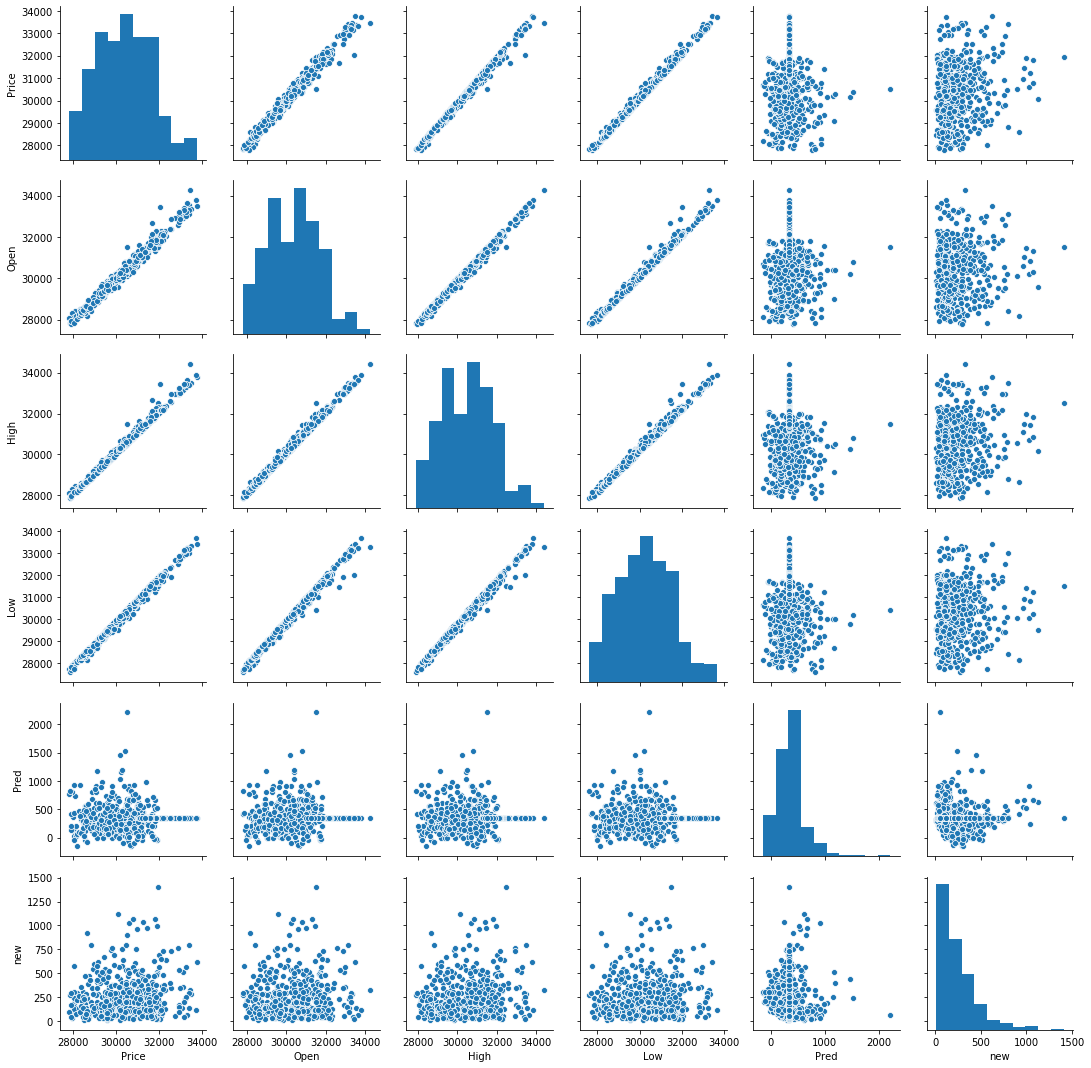

In [5]:
sns.pairplot(data[['Price','Open','High','Low','Vol.','Change %','Pred','new']])

In [6]:
data['Vol.']=data['Vol.'].str.replace('K','').astype(float)

In [7]:
data['Change %']=data['Change %'].str.replace('%','').astype(float)

In [8]:
#seperating independent and dependent variables
x = data.drop(['Date'],axis=1)
y = data['new']
x.shape, y.shape

((512, 8), (512,))

In [9]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 64)

In [11]:
#importing Linear Regression and metric mean square error
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae

In [12]:
# Creating instance of Linear Regresssion
lr = LR()

# Fitting the model
lr.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_x)
k = mae(train_predict, train_y)
print('Training Mean Absolute Error', k )

Training Mean Absolute Error 4.411683981094446e-12


In [17]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_x)
k = mae(test_predict, test_y)
print('Test Mean Absolute Error    ', k )

Test Mean Absolute Error     4.076489146243034e-12


In [14]:
lr.coef_

array([-5.22805220e-15,  3.27824685e-15, -5.46369268e-15,  3.32651443e-15,
        9.32415051e-16,  7.88615399e-16,  2.20635702e-17,  1.00000000e+00])

Text(0.5, 1.0, 'Coefficient plot')

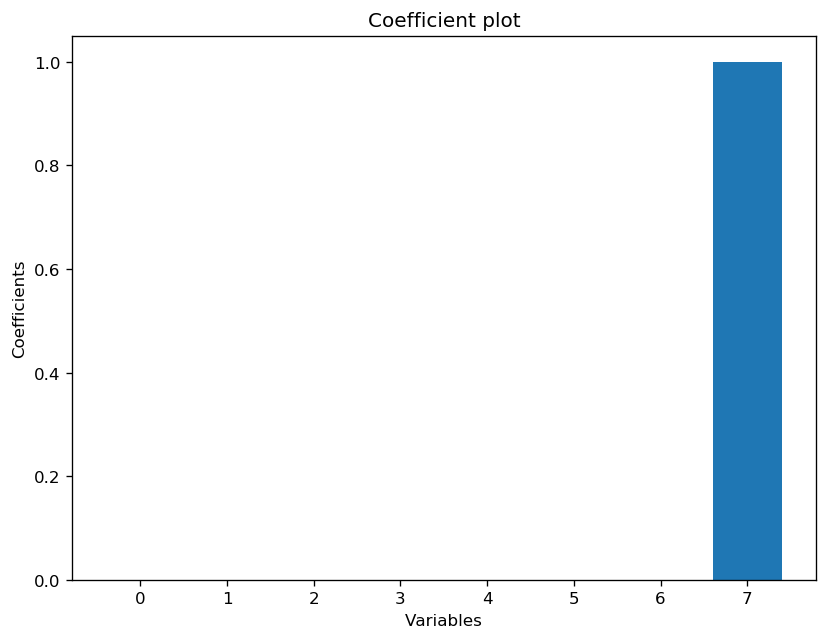

In [15]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

In [18]:
# Arranging and calculating the Residuals
residuals = pd.DataFrame({
    'fitted values' : test_y,
    'predicted values' : test_predict,
})

residuals['residuals'] = residuals['fitted values'] - residuals['predicted values']
residuals.head()

,fitted values,predicted values,residuals
194,352.357427,352.357427,-2.842171e-13
391,22.253219,22.253219,2.259526e-12
249,112.300304,112.300304,3.637979e-12
186,753.020750,753.020750,-1.364242e-12
7,120.069010,120.069010,-9.563905e-12


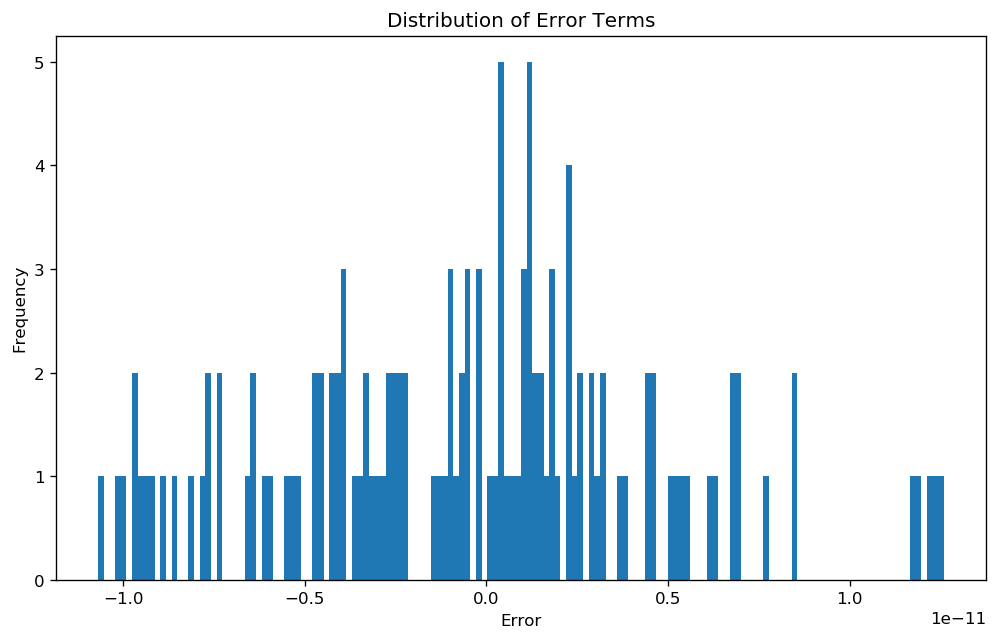

In [19]:
# Histogram for distribution
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
plt.hist(residuals.residuals, bins = 150)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Error Terms')
plt.show()

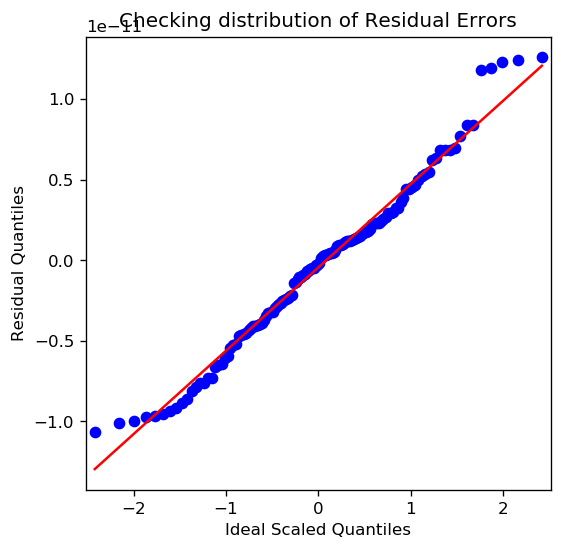

In [20]:
# importing the QQ-plot from the from the statsmodels
from statsmodels.graphics.gofplots import qqplot

## Plotting the QQ plot
fig, ax = plt.subplots(figsize=(5,5) , dpi = 120)
qqplot(residuals.residuals, line = 's' , ax = ax)
plt.ylabel('Residual Quantiles')
plt.xlabel('Ideal Scaled Quantiles')
plt.title('Checking distribution of Residual Errors')
plt.show()

In [27]:
data[:2]

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08,-1.79,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06,0.44,-146.0,295.430176
